<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **EBAC** | Python: Projeto Final

# **Sumário**

<ol type="1">
  <li>Introdução;</li>
  <li>Exploração de dados;</li>
  <li>Manipulação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Conclusões.</li>
</ol>


---

# **Projeto Phyton**

## 1\. Introdução

O ponto de partida desse projeto são dados disponibilizados no material de apoio do curso através de um arquivo com formato csv com dados de crédito bancario de clientes.

O objetivo do projeto é fazer a exploração, manipulação, limpeza e visualização de dados utilizando o Kaglle. Além disso, é esperado que sejam gerados insights
a partir dos dados analisados para uma melhor gestão de clientes inadimplentes.


## 2\. Exploração de Dados

Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira.

Queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

> A segunda coluna, chamada de **default**, indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`).

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**.

> Os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



### **2.1. Bibliotecas e Estrutura**

Importar as bibliotecas que serão utilizadas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/python-m10-support-material/Python_M10_support material.csv', na_values='na')

Análise inicial dos dados visualizando as primeiras linhas.

In [3]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Análise da estrutura do conjunto de dados.

In [4]:
# dados gerais (qtd linhas, qtd colunas)
df.shape

(10127, 16)

In [5]:
# adimplentes
df[df['default'] == 0].shape

(8500, 16)

In [6]:
#inadimplentes
df[df['default'] == 1].shape

(1627, 16)

In [7]:
#informações gerais em valores absolutos e %
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### **2.2. Tipos de Dados**

Análise dos tipos de dados.

In [8]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 Tipo de Dados: Atributos categóricos

In [9]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 Tipo de Dados: Atributos numéricos

In [10]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.3. Dados faltantes**

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

Validação das colunas com dados faltantes.

In [11]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Análise das colunas com dados faltantes.

In [12]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [13]:
# dados gerais
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [14]:
# adimplentes
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [15]:
# inadimplentes
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 3\. Manipulação e limpeza de dados

Execução de *data wrangling* - transformação e limpeza dos dados do conjunto para que possam ser melhor analisados.

### **3.1. Correção do tipo de dado**

Identificação de colunas com classificação incorreta.

> As colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [16]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [17]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Criar função para limpar os dados.

In [18]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Aplicar nas colunas identificadas anteriormente.

In [19]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Validação se o ajuste foi realizado.

In [20]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [21]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [22]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **3.2. Remoção de dados faltantes**

Remoção das linhas com dados faltantes.

In [23]:
df.dropna(inplace=True)

Análise da estrutura dos dados após remoção dos dados faltantes.

In [24]:
# dados gerais
df.shape

(7081, 16)

In [25]:
# adimplentes
df[df['default'] == 0].shape

(5968, 16)

In [26]:
# inadimplentes
df[df['default'] == 1].shape

(1113, 16)

In [27]:
#informações gerais em valores absolutos e % após remoção dos dados faltantes
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 4\. Visualização de dados

Criar visualizações para correlacionar as variáveis e entender o comportamento dos clientes de acordo com os dados disponíveis.

Definições para estilo dos gráficos.

In [28]:
sns.set_style("white")
sns.set_color_codes(palette="colorblind")

In [29]:
dataset = df

In [30]:
df_adimplente = df[df['default'] == 0]

In [31]:
df_inadimplente = df[df['default'] == 1]

Avaliação da relação entre a variável resposta **default** com os atributos categóricos.

In [32]:
def graf_bar (coluna):

  df_combined = pd.concat([df_adimplente[coluna].value_counts().rename('Adimplentes'),
                          df_inadimplente[coluna].value_counts().rename('Inadimplentes')],
                        axis=1, sort=False).fillna(0)

  fig, ax = plt.subplots(figsize=(8, 4))

  df_combined.plot(kind='bar', stacked=True, ax=ax, color=['grey', 'orange'])

  ax.set_title(coluna.capitalize(), fontsize=12)
  ax.set_xlabel(coluna.capitalize(), fontsize=10)
  ax.set_ylabel('Frequência Absoluta', fontsize=10)
  ax.legend(title='Status', fontsize=10)

  plt.xticks(rotation=0)

  plt.show()

 - Escolaridade

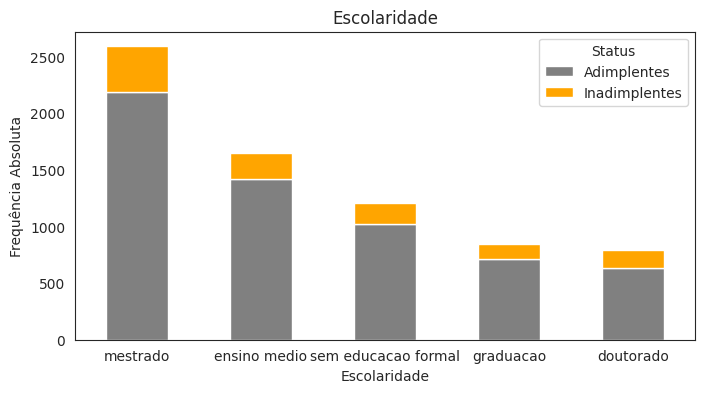

In [33]:
graf_bar('escolaridade')

 - Salário Anual

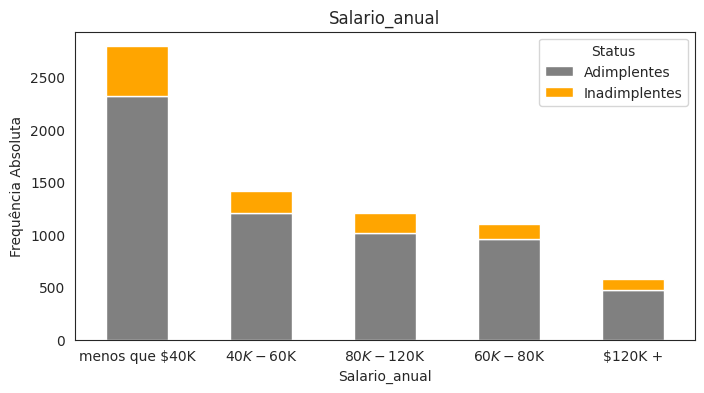

In [34]:
graf_bar('salario_anual')

- Tipo de cartão

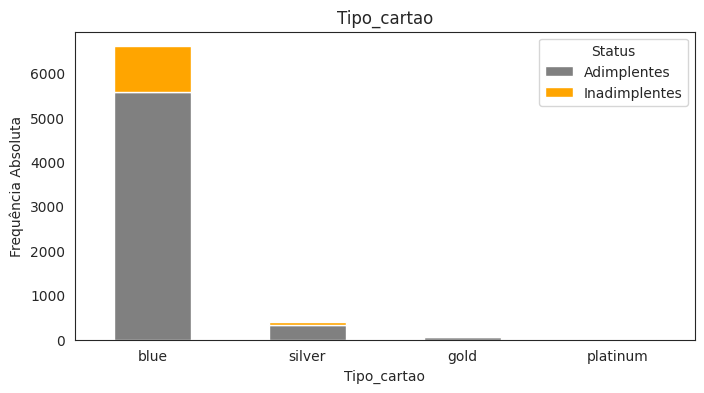

In [35]:
graf_bar('tipo_cartao')

Avaliação da relação entre a variável resposta **default** com os atributos numéricos.

 - Quantidade de Transações nos Últimos 12 Meses

In [36]:
def graf_hist_qtd(coluna):
  coluna = coluna
  titulos = ['Qtd Transações no Último Ano', 'Qtd Transações no Último Ano (Adimplentes)', 'Qtd Transações no Último Ano (Inadimplentes)']
  cores = ['blue', 'grey', 'orange']

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(15, 4), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo], color=cores[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.axes.set_title(titulos[eixo], fontsize=10)
    f.axes.set_xlabel(coluna.capitalize(), fontsize=10)
    f.axes.set_ylabel('Frequência Absoluta', fontsize=10)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

 - Valor das Transações nos Últimos 12 Meses

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


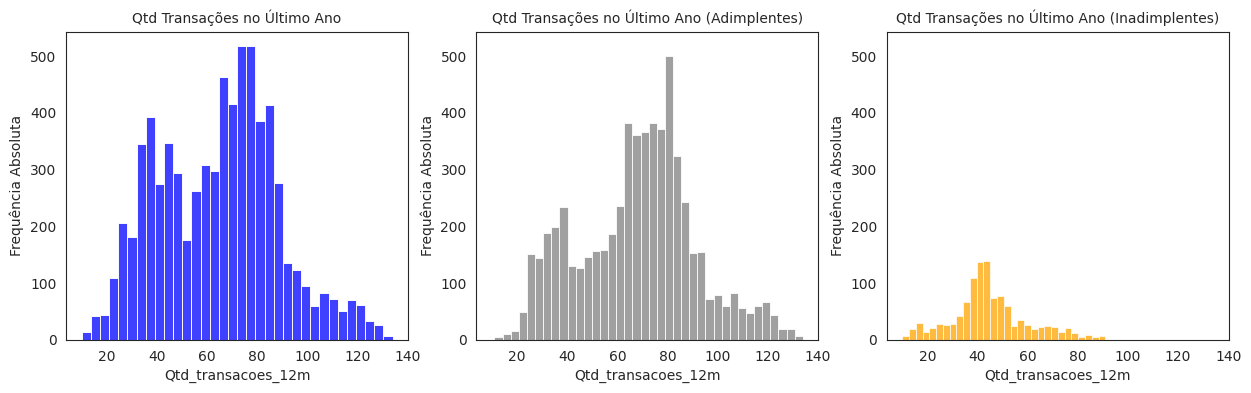

In [37]:
graf_hist_qtd('qtd_transacoes_12m')

 - Valor de Transações nos Últimos 12 Meses

In [38]:
def graf_hist_valor(coluna):
  coluna = coluna
  titulos = ['Valor Transações no Último Ano', 'Valor Transações no Último Ano (Adimplentes)', 'Valor Transações no Último Ano (Inadimplentes)']
  cores = ['blue', 'grey', 'orange']  # Define cores para cada gráfico

  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(15, 4), sharex=True)

  for dataframe in [df, df_adimplente, df_inadimplente]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo], color=cores[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.axes.set_title(titulos[eixo], fontsize=10)
    f.axes.set_xlabel(coluna.capitalize(), fontsize=10)
    f.axes.set_ylabel('Frequência Absoluta', fontsize=10)
    f.tick_params(axis='x', labelsize=8)
    f.tick_params(axis='y', labelsize=8)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

  figura.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


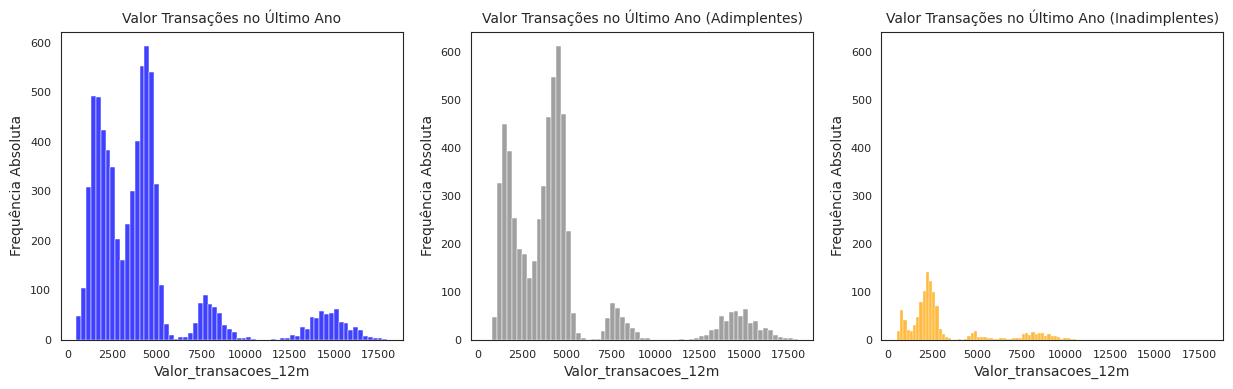

In [39]:
graf_hist_valor('valor_transacoes_12m')

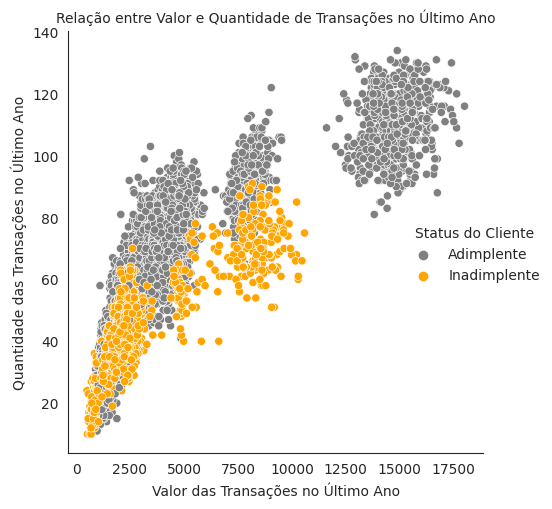

In [40]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default', palette={0: 'grey', 1: 'orange'})
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
)

plt.title('Relação entre Valor e Quantidade de Transações no Último Ano', fontsize=10)
plt.xlabel('Valor das Transações no Último Ano', fontsize=10)
plt.ylabel('Quantidade das Transações no Último Ano', fontsize=10)

# Customize legend
legend = f._legend
legend.set_title("Status do Cliente")  # Change legend title
for t, l in zip(legend.texts,("Adimplente", "Inadimplente")):
    t.set_text(l)

plt.show()

## 5\. Conclusões

Após etapas anteriores, é possível concluir que:

> Os clientes com dados faltantes foram excluídos da análise para evitar gerar insights incorretos, porém recomenda-se o preenchimento das informações para novos clientes para que as próximas análises sejam mais completas.

> Os atributos categóricos não trouxeram informações relevantes quanto ao comportamento de adimplência e inadimplência dos clientes.

> Não há tendência de inadimplência para valores de transações maiores que 12,5K no ano.

> Não há tendência de inadimplência para cliente com mais de 100 de transações no ano.

> Os clientes com baixo número de transações e baixo valor de transações menores ao ano devem ser analisados e acompanhados mais de perto em relação a sua adimplência.